## 1.a Executive summary

 The main focus of this project  is to predict whether  clients will open  term deposits (variable y) using sociodemographic, social and economic context attributes and account attributes.

 Different supervised classification models were used .

The results show that the Logistic regression model (using Ridge algorithm) is the best predictor based on ROC score and the most important features explored by Ride were. 
    Consumer price index, Communication type cellular 
    Contact Month Jul, Consumers confidence Index
    Age, Job technician

## 1.1 Import Libraries

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


np.random.seed(1)
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import roc_curve, auc, roc_auc_score

## 1.2 Data Dictionary

Data fields
Input variables:

### 1.2a Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### 1.2b Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


### 1.2c Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### 1.2d social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): 
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Import Data set

In [2]:
raw_data= pd.read_csv('data_visualisation')


##  Data Preprocessing

In [3]:
raw_data.columns, raw_data.shape

(Index(['Unnamed: 0', 'age', 'job', 'marital', 'education',
        'have_credit_by_default', 'housing_loan', 'personal_loan',
        'communication_type', 'month', 'last_contact_day',
        'last_contact_duration', 'no_contact_with_client',
        'n_days_clcontact_prev_campaign',
        'no_contct_bef_campaign_wth_samepersn', 'employee_variatn_rate',
        'consmr_price_indx', 'conmrs_confidnc_indx', 'y'],
       dtype='object'), (2999, 19))

In [4]:
raw_data.head()
raw_data = raw_data.drop('Unnamed: 0', axis=1)

In [5]:
raw_data

,age,job,marital,education,have_credit_by_default,housing_loan,personal_loan,communication_type,month,last_contact_day,last_contact_duration,no_contact_with_client,n_days_clcontact_prev_campaign,no_contct_bef_campaign_wth_samepersn,employee_variatn_rate,consmr_price_indx,conmrs_confidnc_indx,y
0,30,blue-collar,married,basic,no,yes,no,cellular,may,fri,487,2,0,0,-1.8,92.893,-46.2,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,0,0,1.1,93.994,-36.4,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,0,0,1.4,94.465,-41.8,0
3,38,services,married,basic,no,no,yes,telephone,jun,fri,17,3,0,0,1.4,94.465,-41.8,0
4,47,admin,married,university.degree,no,yes,no,cellular,nov,mon,58,1,0,0,-0.1,93.200,-42.0,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,0,2,-1.1,94.199,-37.5,0
6,32,admin,single,university.degree,no,yes,no,cellular,sep,mon,290,4,0,0,-1.1,94.199,-37.5,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44,2,0,0,-0.1,93.200,-42.0,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68,1,0,1,-0.1,93.200,-42.0,0
9,35,blue-collar,married,basic,unknown,no,no,telephone,may,thu,170,1,0,0,1.1,93.994,-36.4,0


# 4.Create dummy variables

In [6]:
data=raw_data.copy()

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'have_credit_by_default',
       'housing_loan', 'personal_loan', 'communication_type', 'month',
       'last_contact_day', 'last_contact_duration', 'no_contact_with_client',
       'n_days_clcontact_prev_campaign',
       'no_contct_bef_campaign_wth_samepersn', 'employee_variatn_rate',
       'consmr_price_indx', 'conmrs_confidnc_indx', 'y'],
      dtype='object')

In [8]:
data.drop(columns=['last_contact_duration'],inplace=True)

In [9]:

data = pd.get_dummies(data, columns =['job', 'marital', 'have_credit_by_default', 'housing_loan', 'personal_loan', 'communication_type','education','last_contact_day','month'])

In [10]:
col=['communication_type_cellular','communication_type_telephone','personal_loan_no','personal_loan_yes','have_credit_by_default_no','have_credit_by_default_unknown','housing_loan_no','housing_loan_yes']
data.groupby(data['y'])[col].sum().sort_values(by=['housing_loan_yes','personal_loan_yes'],ascending=True).T

y,1,0
communication_type_cellular,271.0,1664.0
communication_type_telephone,60.0,1004.0
personal_loan_no,275.0,2162.0
personal_loan_yes,56.0,506.0
have_credit_by_default_no,289.0,2114.0
have_credit_by_default_unknown,42.0,554.0
housing_loan_no,158.0,1252.0
housing_loan_yes,173.0,1416.0


# 5. Model prediction

In [11]:
y = data.y.values
X = data.drop('y', axis=1)

### 5.1 Try SMOTE tackle the imbalance

In [12]:
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)
#print(Xs.values)
print(Xs)
# Standardization is necessary for regularized regression because the beta
# values for each predictor variable must be on the same scale. If betas
# are different sizes just because of the scale of predictor variables
# the regularization term can't determine which betas are more/less 
# important based on their size.

[[-0.96194567 -0.20607401 -0.16516587 ... -0.34621608 -0.13283472
  -0.13021098]
 [-0.08650311  0.57622466 -0.16516587 ... -0.34621608 -0.13283472
  -0.13021098]
 [-1.44830265 -0.59722334 -0.16516587 ... -0.34621608 -0.13283472
  -0.13021098]
 ...
 [ 1.95619622 -0.20607401 -0.16516587 ... -0.34621608  7.52815229
  -0.13021098]
 [-0.76740288 -0.59722334 -0.16516587 ...  2.88836963 -0.13283472
  -0.13021098]
 [ 2.63709599  0.18507533 -0.16516587 ... -0.34621608 -0.13283472
  -0.13021098]]


## 5.1.a Using SMOTE to tackle imbalance dataset


* In each of these cases, only a small fraction of observations are actually positives. Only 10% of the customers opened an account. Recently, oversampling the minority class observations has become a common approach to improve the quality of predictive modeling. By oversampling, models are sometimes better able to learn patterns that differentiate classes. upsample you sample on you train set in a small class .push it in your learning algorthim. predicted on your test. accuracy is not usable. we use auroc to do the model validation.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y,test_size = .1,random_state=12)

In [15]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique)
print(counts)
y_train.shape
baseline2= 2398/4796
print('baseline:',baseline2 )

[0 1]
[2398 2398]
baseline: 0.5


### 5.2.a. Logistic regression

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Feature selection

In [18]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

rfe = RFE(lg, 18)
rfe = rfe.fit(X_train, y_train )
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True  True  True False False False  True  True
 False  True  True False False False False False False False False  True
 False False  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False]
[ 3  1  1 21  1  1  1 17 16  5  1  1 15  1  1  8 11 18  2 31  7 14 23  1
 10  6  1  1  1 24 25 29  4  9 19 27 20 30 13 26 28  1  1  1  1  1 22 12]


In [19]:
Logistics_lg=rfe.score(X_test,y_test)
Logistics_lg

0.7733333333333333

In [20]:
Feature_selection = pd.DataFrame({'variable':X.columns,
                            'select':rfe.support_,
                            'rank':rfe.ranking_})

Feature_selection.sort_values('select', inplace=True, ascending=False)

Feature_selection.head(20)

,rank,select,variable
41,1,True,month_jul
11,1,True,job_management
23,1,True,housing_loan_no
1,1,True,no_contact_with_client
26,1,True,personal_loan_yes
27,1,True,communication_type_cellular
14,1,True,job_services
13,1,True,job_self-employed
42,1,True,month_jun
10,1,True,job_housemaid


In [21]:
y_pred=rfe.predict(X_test)

In [22]:
#*we will use ROC to check the accuracy, since the datset was imbalance we cant use accuracy as a measurement
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred)
auc_feat= auc(fp_rate, tp_rate,'\n')
print(auc_feat)

0.7259259259259259


### Grid search CV

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.7866666666666666


In [24]:
# Set up the parameters. Looking at C regularization strengths on a log scale.
# This takes awhile...
from sklearn.model_selection import GridSearchCV
gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   42.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([1.00000e-05, 1.12332e-05, ..., 8.90215e-01, 1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [25]:
# best score on the training data:
lr_gridsearch.best_score_

0.7099666388657214

In [26]:
# best parameters on the training data:
lr_gridsearch.best_params_
# Ridge was chosen: this indicates that multicolinerity is an issuesb

{'C': 0.021544346900318846, 'penalty': 'l1', 'solver': 'liblinear'}

In [27]:
# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_
best_lr
# Score it on the testing data:
lr_Grid=best_lr.score(X_test, y_test)
lr_Grid
#very good!

0.7933333333333333

In [28]:
y_pred2=best_lr.predict(X_test)

In [29]:
#*we will use ROC to check the accuracy, since the datset was imbalance we cant use accuracy as a measurement
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred2)
auc_grid= auc(fp_rate, tp_rate,'\n')
print(auc_grid)

0.7222222222222222


In [30]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0],
        'feature':X.columns
    })

In [31]:
coef_df['abs_coef'] = np.abs(coef_df.coef)

In [32]:
# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

In [33]:
# Show non-zero coefs and predictors
coef_df[coef_df.coef != 0].head(20)

,coef,feature,abs_coef
4,-0.803918,employee_variatn_rate,0.803918
5,0.418400,consmr_price_indx,0.418400
44,-0.239124,month_may,0.239124
2,0.202091,n_days_clcontact_prev_campaign,0.202091
1,-0.178415,no_contact_with_client,0.178415
45,-0.172401,month_nov,0.172401
27,0.168264,communication_type_cellular,0.168264
28,-0.124532,communication_type_telephone,0.124532
11,-0.124254,job_management,0.124254
13,-0.114535,job_self-employed,0.114535


In [34]:
# from sklearn.linear_model import LogisticRegression
# # Create logistic regression
# logistic = LogisticRegression()
# # Create regularization penalty space
# penalty = ['l1', 'l2']

# # Create regularization hyperparameter space
# C = np.logspace(0, 4, 10)

# # Create hyperparameter options
# hyperparameters = dict(C=C, penalty=penalty)
# # Create grid search using 5-fold cross validation
# clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
# # Fit grid search
# best_model = clf.fit(X_train, y_train)
#  #View best hyperparameters
# print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
# print('Best C:', best_model.best_estimator_.get_params()['C'])
# print('Coefficient of each feature:', best_model.best_estimator_.coef_)
# print('Training accuracy:', best_model.best_estimator_.score(X_train, y_train))
# print('Test accuracy:', best_model.best_estimator_.score(X_test, y_test))
# # Predict target vector
# #print('Predict target vector',best_model.predict(X_test))
# #seems the best algorthm is ridge

### 5.2.b Ridge

In [35]:
#Find an optimal value for Ridge regression alpha using RidgeCV
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000e+00, 1.05956e+00, ..., 9.43788e+04, 1.00000e+05]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [36]:
print(optimal_ridge.alpha_)

1.0


In [37]:
ridge_pred = optimal_ridge.predict(X_test)

ridge_score=optimal_ridge.score(X_test, y_test)
ridge_score

-0.866194309149542

In [38]:
list(zip(optimal_ridge.coef_, X))

[(0.031066302926580747, 'age'),
 (-0.048996803851151544, 'no_contact_with_client'),
 (0.016509409471543793, 'n_days_clcontact_prev_campaign'),
 (-0.0009718912832375794, 'no_contct_bef_campaign_wth_samepersn'),
 (-0.22836528378055795, 'employee_variatn_rate'),
 (0.14019604542279843, 'consmr_price_indx'),
 (0.03410809904705742, 'conmrs_confidnc_indx'),
 (0.018420646776906354, 'job_admin'),
 (0.015550797650474645, 'job_blue-collar'),
 (-0.011145683295874035, 'job_entrepreneur'),
 (-0.023712144283121805, 'job_housemaid'),
 (-0.033197011793993904, 'job_management'),
 (0.0077766923381298566, 'job_retired'),
 (-0.034355443265049565, 'job_self-employed'),
 (-0.015041142971700477, 'job_services'),
 (-0.006761220528347933, 'job_student'),
 (0.025491349639553854, 'job_technician'),
 (0.006754134873095973, 'job_unemployed'),
 (-0.02279815393184428, 'marital_divorced'),
 (0.0008856588331895486, 'marital_married'),
 (0.014859247276272478, 'marital_single'),
 (0.005426783783015637, 'have_credit_by_de

*Calculate the accuracy on the test set and compare to baseline.**

In [39]:
print(optimal_ridge.score(X_test, y_test))

-0.866194309149542


In [40]:
#*we will use ROC to check the accuracy, since the datset was imbalance we cant use accuracy as a measurement
fp_rate, tp_rate, thresholds = roc_curve(y_test, ridge_pred)
auc_ridge= auc(fp_rate, tp_rate,'\n')
print(auc_ridge)

0.778888888888889


### 5.2.c Lasso

In [41]:
lr= LogisticRegression(penalty='l1', C=0.02, solver='liblinear')


Run Logistic Regression With A L1 Penalty With Various Regularization Strengths
The usefulness of L1 is that it can push feature coefficients to 0, creating a method for feature selection. In the code below we run a logistic regression with a L1 penalty

In [42]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
lasso_score=lr.score(X_test,y_test)
lasso_score

0.79

In [44]:
y_pred4 = lr.predict(X_test)
list(zip(y_pred4,y_test))



[(0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 

### We will use ROC as my metric to check performance, since the datset was imbalance we can't use accuracy as a measurement

In [45]:

fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred4)
auc_lasso= auc(fp_rate, tp_rate,'\n')
print(auc_lasso)

0.7203703703703703


In [46]:
df = pd.DataFrame(columns=['y_test','y_predict'])
df.y_test=y_test
df.y_predict=y_pred4
print(df[df['y_test']==df['y_predict']].count(),'y_test=',len(y_test))

y_test       237
y_predict    237
dtype: int64 y_test= 300


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred4)
print(confusion_matrix)

[[218  52]
 [ 11  19]]


The result is telling us that we have 739+1006 correct predictions and 119 incorrect predictions.

In [48]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
list(zip(lr.coef_, X))

[(array([ 0.05067921, -0.1717701 ,  0.20127266,  0.03133519, -0.78598962,
          0.39838761,  0.0769396 ,  0.02949722,  0.        , -0.00572145,
         -0.0621932 , -0.11731812,  0.03984486, -0.10661833, -0.05457857,
          0.        ,  0.04391484,  0.        , -0.0458372 ,  0.        ,
          0.02561828,  0.        ,  0.        ,  0.06682226, -0.0080159 ,
          0.01476818, -0.08832523,  0.        , -0.27894931,  0.        ,
          0.        ,  0.        ,  0.0068605 , -0.01388176,  0.        ,
          0.        ,  0.        ,  0.        , -0.02775719,  0.        ,
          0.        ,  0.04655881,  0.04026179,  0.09639358, -0.24451136,
         -0.1706368 ,  0.        ,  0.        ]), 'age')]

In [51]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lr.coef_[0],
                            'abs_coef':np.abs(lr.coef_[0])})

lasso_coefs.sort_values('coef', inplace=True, ascending=False)

lasso_coefs.head(20)#lasso_coefs.head(20).plot()

,abs_coef,coef,variable
5,0.398388,0.398388,consmr_price_indx
2,0.201273,0.201273,n_days_clcontact_prev_campaign
43,0.096394,0.096394,month_mar
6,0.076940,0.076940,conmrs_confidnc_indx
23,0.066822,0.066822,housing_loan_no
0,0.050679,0.050679,age
41,0.046559,0.046559,month_jul
16,0.043915,0.043915,job_technician
42,0.040262,0.040262,month_jun
12,0.039845,0.039845,job_retired


Compute precision, recall, F-measure and support
To quote from Scikit Learn:
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
The support is the number of occurrences of each class in y_test.

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

             precision    recall  f1-score   support

          0       0.95      0.81      0.87       270
          1       0.27      0.63      0.38        30

avg / total       0.88      0.79      0.82       300



The usefulness of L1 is that it can push feature coefficients to 0, creating a method for feature selection. In the code below we run a logistic regression with a L1 penalty four times, each time decreasing the value of C. We should expect that as C decreases, more coefficients become 0.

### 5.2.d ExtraTreeClassifier

In [53]:
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
rfc = ExtraTreesClassifier(bootstrap=True,n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(3, 10)
    
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)
print ('\n',CV_rfc.best_estimator_)


 ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=9, max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)


In [54]:
ex_tree = ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=9, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [55]:
ex_tree.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=9, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [56]:
y_pred5 = ex_tree.predict(X_test)

In [57]:
#*we will use ROC to check the accuracy, since the datset was imbalance we cant use accuracy as a measurement
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred5)
auc_extree= auc(fp_rate, tp_rate,'\n')
print(auc_extree)

0.7240740740740741


In [58]:
#To create a data frmae to show how many target varibales were predicted correctly.
df = pd.DataFrame(columns=['y_test','y_predict'])
df.y_test=y_test
df.y_predict=y_pred5
print(df[df['y_test']==df['y_predict']].count(),'y_test=',len(y_test))

y_test       263
y_predict    263
dtype: int64 y_test= 300


In [59]:
ExtraTreeClassifier_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ex_tree.feature_importances_,
                            })

ExtraTreeClassifier_coefs.sort_values('coef', inplace=True, ascending=False)

ExtraTreeClassifier_coefs.head(20)#ExtraTreeClassifier_coefs.head(20).plot()

,coef,variable
4,0.110427,employee_variatn_rate
27,0.075326,communication_type_cellular
28,0.066203,communication_type_telephone
44,0.039855,month_may
2,0.039223,n_days_clcontact_prev_campaign
3,0.032687,no_contct_bef_campaign_wth_samepersn
24,0.031554,housing_loan_yes
23,0.029950,housing_loan_no
6,0.029517,conmrs_confidnc_indx
20,0.029204,marital_single


In [60]:
ex_tree.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 4 (0.068222)
2. feature 0 (0.046138)
3. feature 1 (0.038404)
4. feature 24 (0.035090)
5. feature 23 (0.035073)
6. feature 27 (0.034172)
7. feature 6 (0.031591)
8. feature 28 (0.031520)
9. feature 20 (0.030487)
10. feature 19 (0.029963)
11. feature 44 (0.028754)
12. feature 5 (0.028651)
13. feature 34 (0.027272)
14. feature 32 (0.027260)
15. feature 7 (0.026953)
16. feature 36 (0.026857)
17. feature 3 (0.025063)
18. feature 35 (0.024431)
19. feature 37 (0.023528)
20. feature 30 (0.023453)
21. feature 29 (0.023219)
22. feature 2 (0.021747)
23. feature 8 (0.021296)
24. feature 21 (0.020901)
25. feature 33 (0.020656)
26. feature 42 (0.019748)
27. feature 22 (0.019623)
28. feature 31 (0.018497)
29. feature 16 (0.017824)
30. feature 26 (0.017683)
31. feature 25 (0.016996)
32. feature 41 (0.015593)
33. feature 45 (0.014398)
34. feature 39 (0.013346)
35. feature 18 (0.012748)
36. feature 11 (0.012440)


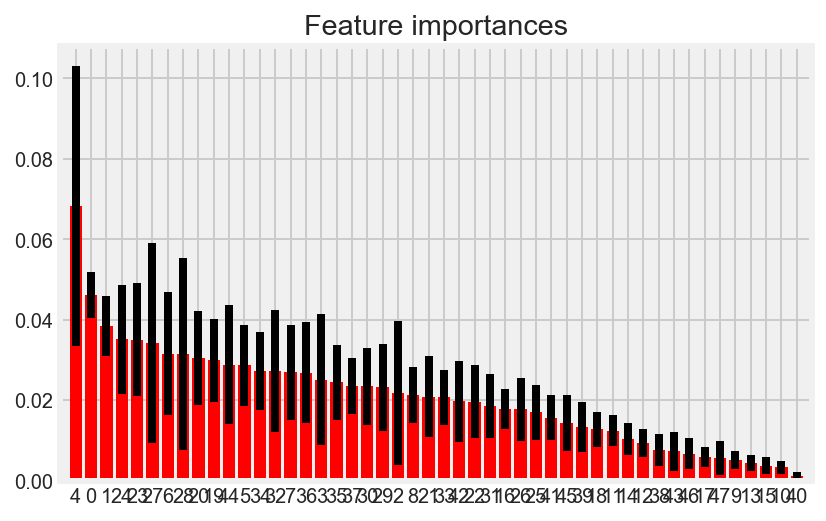

In [61]:
print(__doc__)

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000,
#                            n_features=10,
#                            n_informative=3,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=2,
#                            random_state=0,
#                            shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=7)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [62]:
extra_tree_score=ex_tree.score(X_test,y_test)
extra_tree_score

0.8766666666666667

Classifier visualization playground:
The purpose of this section is to visualize logistic regression classsifiers’ decision boundaries. In order to better vizualize the decision boundaries, I Will perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions.

### 5.2.e. KNN

kNN is powerful because it does not assume anything about the data, other than a distance measure can be calculated consistently between any two instances. As such, it is called non-parametric or non-linear as it does not assume a functional form. Lazy learning refers to the fact that the algorithm does not build a model until the time that a prediction is required. It is lazy because it only does work at the last second. This has the benefit of only including data relevant to the unseen data, called a localized model. A disadvantage is that it can be computationally expensive to repeat the same or similar searches over larger training datasets.

In [63]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

Iterate from k=1 to k=49 (only odd k) and cross-validate the accuracy of the model for each.

In [64]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
# we create a list
weight_options = ['uniform', 'distance']
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [65]:
#instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [67]:
grid.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

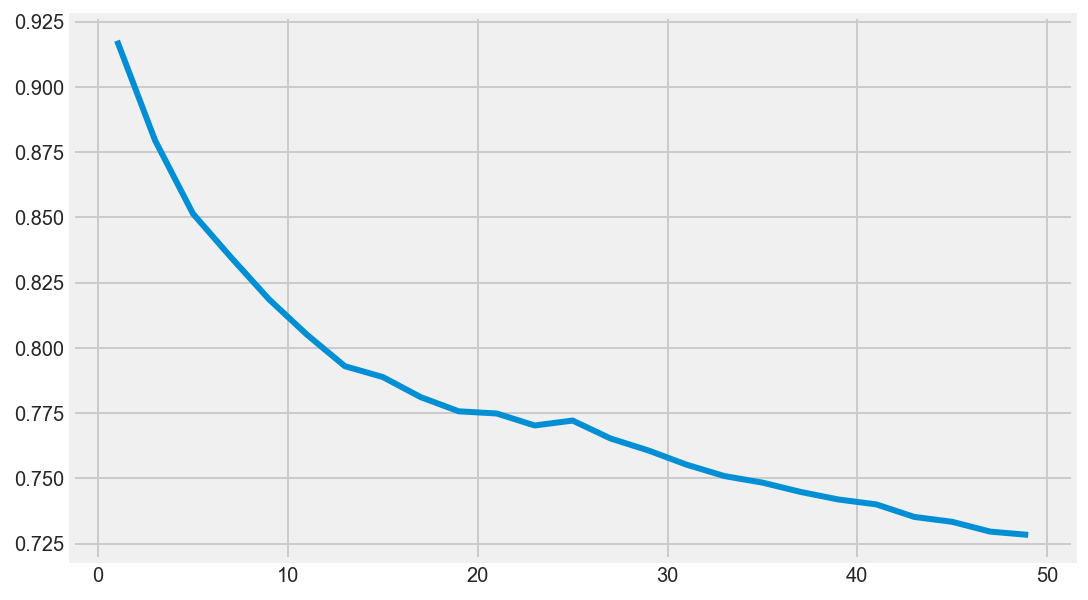

In [68]:
k_values = list(range(1,50,2))
accs = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    accs.append(np.mean(scores))
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(k_values, accs, lw=3)
plt.show()



In [69]:
print('mean of the scores',np.mean(scores))


mean of the scores 0.7283237447698745


In [70]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state = 3)
knn = KNeighborsClassifier(algorithm='brute',n_neighbors=2,weights= 'uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

*Calculate the accuracy on the test set and compare to baselin*

In [71]:
print ('Test accuracy: ', knn.score(X_test, y_test))
knn_score=knn.score(X_test, y_test)

Test accuracy:  0.8433333333333334


**Calculate the predicted labels and predicted probabilities on the test set.**

In [72]:
# predict test class:
y_pred6 = knn.predict(X_test)

# predicted test probability:
y_pp = knn.predict_proba(X_test)

In [73]:
#*we will use ROC to check the accuracy, since the datset was imbalance we cant use accuracy as a measurement
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred6)
auc_knn= auc(fp_rate, tp_rate,'\n')
print(auc_knn)

0.6462962962962963


In [74]:
list(zip(y_pred,y_test))

[(0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 

Create the confusion matrix for your classfier's performance on the test set.

In [75]:
df3 = pd.DataFrame(columns=['y_test','y_predict'])
df3.y_test=y_test
df3.y_predict=y_pred
print(df3[df3['y_test']==df3['y_predict']].count(),'y_test=',len(y_test))

y_test       232
y_predict    232
dtype: int64 y_test= 300


### 5.2.f. Random Forest tree

f one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the bagging base trees, causing them to become correlated. By selecting a random subset of the features at each split, we avoid this correlation between base trees, strengthening the overall model.

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

In [77]:
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [79]:
from sklearn.grid_search import GridSearchCV
 
rfc = RandomForestClassifier(bootstrap=True,n_jobs=-1,max_features='sqrt', oob_score = True, random_state=0) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]
           }
    
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("So

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Jasper\Downloads\download\Anaconda\lib\site-packages\sk

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 54}


In [80]:
print (CV_rfc.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 54}


In [78]:
RF = RandomForestClassifier(n_jobs=2, random_state=0,max_depth= 20, min_samples_leaf= 1, n_estimators= 54)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=54, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [79]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
y_pred7=RF.predict(X_test)

In [80]:
# View the predicted probabilities of the first 10 observations
RF.predict_proba(X_test)[0:10]

array([[1.        , 0.        ],
       [0.63247863, 0.36752137],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.94811566, 0.05188434],
       [0.9286325 , 0.0713675 ],
       [0.9800995 , 0.0199005 ],
       [0.82638889, 0.17361111],
       [0.90740741, 0.09259259]])

In [81]:
list(zip(X,RF.feature_importances_))

[('age', 0.05489504500783543),
 ('no_contact_with_client', 0.06767028841230915),
 ('n_days_clcontact_prev_campaign', 0.04017439022102192),
 ('no_contct_bef_campaign_wth_samepersn', 0.03791509915728725),
 ('employee_variatn_rate', 0.0827138534648879),
 ('consmr_price_indx', 0.04377107072658019),
 ('conmrs_confidnc_indx', 0.05323989142661248),
 ('job_admin', 0.02701948406217746),
 ('job_blue-collar', 0.017914602623164175),
 ('job_entrepreneur', 0.002919815943695639),
 ('job_housemaid', 0.001690912520308352),
 ('job_management', 0.008261722171169099),
 ('job_retired', 0.006707395160798324),
 ('job_self-employed', 0.0020770727914502848),
 ('job_services', 0.008234334200025938),
 ('job_student', 0.0016651698129854873),
 ('job_technician', 0.01441215421624427),
 ('job_unemployed', 0.003157672262930015),
 ('marital_divorced', 0.010702567252729263),
 ('marital_married', 0.028386650467177116),
 ('marital_single', 0.03339245129307141),
 ('have_credit_by_default_no', 0.020908017066969656),
 ('hav

In [82]:
RF.score(X_test,y_test)

0.9133333333333333

In [83]:
random_score=RF.score(X_test,y_test)

In [84]:
df4 = pd.DataFrame(columns=['y_test','y_predict'])
df4.y_test=y_test
df4.y_predict=y_pred7
print(df4[df4['y_test']==df4['y_predict']].count(),'y_test=',len(y_test))

y_test       274
y_predict    274
dtype: int64 y_test= 300


In [85]:
#*we will use ROC to check the accuracy, since the datset was imbalance we cant use accuracy as a measurement
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred7)
auc_RF=auc(fp_rate, tp_rate,'\n')
print(auc_RF)


0.6851851851851851


### 5.2.g. Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB


*MultinomialNB assumes that features have multinomial distribution which is a generalization of the binomial distribution. Neither binomial nor multinomial distributions can contain negative values. So,I use Gaussian*.
It assumes that continuous features follow a normal distribution.
There isn't a hyper-parameter to tune, so you have nothing to grid search over(didnt use Grid search).


In [87]:
#X = X_resampled
#Y = y_resampled
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None)

In [88]:
# Predicting the Test set results
y_pred8 = NB.predict(X_test)
y_pred8 

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [89]:
list(zip(NB.predict_proba(X_test).round(1),X.columns))
#The columns give the posterior probabilities of the first and second label, respectively. 
#If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

[(array([1., 0.]), 'age'),
 (array([0., 1.]), 'no_contact_with_client'),
 (array([0., 1.]), 'n_days_clcontact_prev_campaign'),
 (array([1., 0.]), 'no_contct_bef_campaign_wth_samepersn'),
 (array([1., 0.]), 'employee_variatn_rate'),
 (array([1., 0.]), 'consmr_price_indx'),
 (array([0.9, 0.1]), 'conmrs_confidnc_indx'),
 (array([0.7, 0.3]), 'job_admin'),
 (array([1., 0.]), 'job_blue-collar'),
 (array([0.3, 0.7]), 'job_entrepreneur'),
 (array([1., 0.]), 'job_housemaid'),
 (array([1., 0.]), 'job_management'),
 (array([1., 0.]), 'job_retired'),
 (array([1., 0.]), 'job_self-employed'),
 (array([0.9, 0.1]), 'job_services'),
 (array([1., 0.]), 'job_student'),
 (array([0.5, 0.5]), 'job_technician'),
 (array([1., 0.]), 'job_unemployed'),
 (array([1., 0.]), 'marital_divorced'),
 (array([1., 0.]), 'marital_married'),
 (array([1., 0.]), 'marital_single'),
 (array([0., 1.]), 'have_credit_by_default_no'),
 (array([1., 0.]), 'have_credit_by_default_unknown'),
 (array([0.9, 0.1]), 'housing_loan_no'),
 (

In [90]:
NB.score(X_test,y_test)


0.8533333333333334

In [91]:
naive_bayes_score=NB.score(X_test,y_test)

In [92]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred8)
print(cm)

[[238  32]
 [ 12  18]]


In [93]:
from sklearn.model_selection import cross_val_score
print((cross_val_score(NB, X_train, y_train, cv=10)))

[0.66041667 0.65416667 0.68125    0.70625    0.68333333 0.71041667
 0.675      0.70625    0.68410042 0.68619247]


In [94]:
#*we will use ROC to check the accuracy, since the datset was imbalance we cant use accuracy as a measurement
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred8)
auc_nb= auc(fp_rate, tp_rate,'\n')
print(auc_nb)


0.7407407407407408


### 5.2.h. SVM

In [95]:
from sklearn import svm
from sklearn.svm import SVC

In [96]:
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['linear','rbf']}
svm_gridsearch = GridSearchCV(SVC(), param_grid_svm, cv=5, verbose=1)
svm_gridsearch.fit(X_train, y_train)
svm_gridsearch.best_params_
#it return roc less than 0.6 with kernel :rbf, so i try linear as well

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 13.2min finished


{'C': 10, 'kernel': 'rbf'}

In [97]:
# from sklearn import svm, grid_search
# from sklearn.model_selection import GridSearchCV
# def svc_param_selection(X, y, nfolds):
#     Cs = [0.001, 0.01, 0.1, 1, 10]
#     gammas = [0.001, 0.01, 0.1, 1]
#     param_grid = {'C': Cs, 'gamma' : gammas}
#     grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
#     grid_search.fit(X, y)
#     grid_search.best_params_
#     return grid_search.best_params_
# svc_param_selection(X_train, y_train, 5)

In [98]:
# Create SVM classification object 
SVM =svm.SVC(kernel='linear', C = 0.001)#the result is much better

In [99]:
SVM.fit(X_train,y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [100]:
svm_score=SVM.score(X_test,y_test)
svm_score

0.8166666666666667

In [101]:
y_pred9=SVM.predict(X_test)

In [102]:
df5 = pd.DataFrame(columns=['y_test','y_predict'])
df5.y_test=y_test
df5.y_predict=y_pred9
print(df5[df5['y_test']==df5['y_predict']].count(),'y_test=',len(y_test))

y_test       245
y_predict    245
dtype: int64 y_test= 300


In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
cm_svm = confusion_matrix(y_test, y_pred9)
print(cm_svm)

[[226  44]
 [ 11  19]]


In [105]:
scores=cross_val_score(SVM, X_train, y_train, cv=5)
print(scores)

[0.690625   0.68125    0.69583333 0.69415449 0.70146138]


In [106]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.01)


In [107]:
#*we will use ROC to check the accuracy, since the datset was imbalance we cant use accuracy as a measurement
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred9)
auc_svm= auc(fp_rate, tp_rate,'\n')
print(auc_svm)


0.7351851851851852


In [108]:
SVM.coef_

array([[ 7.95658009e-02, -8.72309507e-02,  1.05396860e-01,
         1.03337221e-01, -4.67554166e-01,  3.72313002e-02,
         7.02208797e-02,  5.17913726e-02, -1.05951310e-03,
        -2.94427749e-02, -3.00914216e-02, -8.95391226e-02,
         6.43443318e-02, -5.03617645e-02, -2.73597470e-02,
         5.15095874e-02,  1.49242366e-02,  2.69656658e-02,
        -4.97572488e-02,  1.09962937e-04,  3.44044682e-02,
         3.40487362e-02, -3.40487362e-02,  3.10885641e-02,
        -3.10885641e-02,  3.49571923e-02, -3.49571923e-02,
         8.84519134e-02, -8.84519134e-02, -2.13256421e-02,
        -2.64030781e-02,  1.36038341e-02,  3.39573348e-02,
        -2.99263448e-02,  1.41098751e-02,  1.92343282e-02,
        -2.45917702e-04, -4.84950387e-03,  9.96922591e-02,
        -3.87175724e-02,  1.13214623e-02,  2.95610949e-02,
         1.06932120e-01,  9.38509456e-02, -7.99403015e-02,
        -1.48139595e-01,  9.46499903e-02,  5.09200655e-02]])

In [109]:
list(zip(SVM.coef_[0],X.columns))

[(0.07956580092341553, 'age'),
 (-0.08723095071490694, 'no_contact_with_client'),
 (0.10539686022679268, 'n_days_clcontact_prev_campaign'),
 (0.10333722139906551, 'no_contct_bef_campaign_wth_samepersn'),
 (-0.46755416626860313, 'employee_variatn_rate'),
 (0.037231300246126475, 'consmr_price_indx'),
 (0.07022087966570972, 'conmrs_confidnc_indx'),
 (0.05179137262460504, 'job_admin'),
 (-0.0010595131044698648, 'job_blue-collar'),
 (-0.029442774925409948, 'job_entrepreneur'),
 (-0.03009142157425221, 'job_housemaid'),
 (-0.08953912260923497, 'job_management'),
 (0.06434433182137796, 'job_retired'),
 (-0.050361764490897354, 'job_self-employed'),
 (-0.027359747038167362, 'job_services'),
 (0.05150958736809126, 'job_student'),
 (0.014924236603922503, 'job_technician'),
 (0.026965665780361095, 'job_unemployed'),
 (-0.04975724875160139, 'marital_divorced'),
 (0.0001099629367967564, 'marital_married'),
 (0.034404468206302344, 'marital_single'),
 (0.034048736210622155, 'have_credit_by_default_no')

## 5.3. AUROC comparison

AUC means Area Under Curve ; you can calculate the area under various curves though. Common is the ROC curve which is about the tradeoff between true positives and false positives at different thresholds. This AUC value can be used as an evaluation metric, especially when there is *imbalanced classes*.
true positive (TP) : predicted to be positive and the actual value is also positive
false positive (FP) : predicted to be positive but the actual value is negative
true negative (TN) : predicted to be negative and the actual value is also negative
false negative (FN) : predicted to be negative but the actual value is positive
AUROC NOT  INFLUECNED BY IMBALNCE DATASET AND ACCURACY IS influenced. test of comparison between true positive rate compare to false positive

In [112]:
#create df with model scores,baseline and AUCROC comparison
models = ['Logistic(lg)','Logistic(Lasso)','Logistic(Ridge)','ExtraTree','KNN','RandomForest','SVM','Naive_Bayes','Baseline']#decsiion tree
#accuracy =[Logistics_lg,lr_Grid,lasso_score,ridge_score,extra_tree_score,knn_score,random_score,svm_score,naive_bayes_score,baseline2]
Roc_comparison = [auc_feat,auc_lasso,auc_ridge,auc_extree,auc_knn,auc_RF,auc_svm,auc_nb,baseline2]
class_summary = pd.DataFrame({'Model':models,'AUCROC Comparison':Roc_comparison})#'Best_Model_Score':accuracy,
class_summary = class_summary.set_index('Model')
#class_summary.groupby('Best Model Score')
class_summary.sort_values('AUCROC Comparison', ascending =False)

,AUCROC Comparison
Model,
Logistic(Ridge),0.778889
Naive_Bayes,0.740741
SVM,0.735185
Logistic(lg),0.725926
ExtraTree,0.724074
Logistic(Lasso),0.720370
RandomForest,0.685185
KNN,0.646296
Baseline,0.500000


In [193]:
Important_features = pd.DataFrame({'Features':X.columns,
                                   
                                    'Logistic(Lasso)':lr.coef_[0],
                                   'Logistic(Ridge)': optimal_ridge.coef_,
                                   'ExtraTree':ex_tree.feature_importances_,
                                   'RandomForest':RF.feature_importances_,
                                    'SVM':SVM.coef_[0]
    
                                   
                            
                                  
                                  })
Important_features=Important_features.set_index('Features')
#class_summary = pd.DataFrame({'Model':models,'Column_names:':Columns_names1,'Features':Features})#'Best_Model_Score':accuracy,
#class_summary = class_summary.set_index('Model')
#class_summary.groupby('Best Model Score')
#class_summary.sort_values('Features', ascending =False)

Important_features.sort_values('Logistic(Ridge)',inplace=True,  ascending=False)

Find the important features for each model

In [223]:
#sort_values(by=['Logistic(Ridge)'],inplace=True,  ascending=False)
Important_features[Important_features['Logistic(Ridge)'] > 0].head(20).round(3)

,ExtraTree,Logistic(Lasso),Logistic(Ridge),RandomForest,SVM
Features,,,,,
consmr_price_indx,0.023,0.398,0.140,0.044,0.037
communication_type_cellular,0.075,0.000,0.041,0.024,0.088
month_jul,0.013,0.047,0.037,0.011,0.030
conmrs_confidnc_indx,0.030,0.077,0.034,0.053,0.070
age,0.010,0.051,0.031,0.055,0.080
job_technician,0.009,0.044,0.025,0.014,0.015
month_jun,0.027,0.040,0.023,0.011,0.107
month_mar,0.013,0.096,0.020,0.003,0.094
job_admin,0.024,0.029,0.018,0.027,0.052


In [225]:
Important_features['Logistic(Ridge)'][Important_features['Logistic(Ridge)'] > 0].head(20).round(3).sort_values(ascending=False)

Features
consmr_price_indx                 0.140
communication_type_cellular       0.041
month_jul                         0.037
conmrs_confidnc_indx              0.034
age                               0.031
job_technician                    0.025
month_jun                         0.023
month_mar                         0.020
job_admin                         0.018
n_days_clcontact_prev_campaign    0.017
personal_loan_no                  0.016
job_blue-collar                   0.016
marital_single                    0.015
month_aug                         0.014
housing_loan_no                   0.014
education_university.degree       0.009
last_contact_day_mon              0.008
job_retired                       0.008
job_unemployed                    0.007
have_credit_by_default_no         0.005
Name: Logistic(Ridge), dtype: float64

In [218]:
Important_features['Logistic(Lasso)'][Important_features['Logistic(Lasso)'] > 0].head(20).round(3).sort_values(ascending=False)

Features
consmr_price_indx                       0.398
n_days_clcontact_prev_campaign          0.201
month_mar                               0.096
conmrs_confidnc_indx                    0.077
housing_loan_no                         0.067
age                                     0.051
month_jul                               0.047
job_technician                          0.044
job_retired                             0.040
month_jun                               0.040
no_contct_bef_campaign_wth_samepersn    0.031
job_admin                               0.029
marital_single                          0.026
personal_loan_no                        0.015
education_university.degree             0.007
Name: Logistic(Lasso), dtype: float64

In [219]:
Important_features['SVM'][Important_features['SVM'] > 0].head(20).round(3).sort_values(ascending=False)

Features
month_jun                         0.107
n_days_clcontact_prev_campaign    0.105
month_oct                         0.095
month_mar                         0.094
communication_type_cellular       0.088
age                               0.080
conmrs_confidnc_indx              0.070
job_retired                       0.064
job_admin                         0.052
consmr_price_indx                 0.037
personal_loan_no                  0.035
marital_single                    0.034
have_credit_by_default_no         0.034
education_university.degree       0.034
housing_loan_no                   0.031
month_jul                         0.030
job_unemployed                    0.027
job_technician                    0.015
last_contact_day_mon              0.014
month_dec                         0.011
Name: SVM, dtype: float64

In [220]:
Important_features['ExtraTree'][Important_features['ExtraTree'] > 0].head(20).round(3).sort_values(ascending=False)


Features
communication_type_cellular       0.075
n_days_clcontact_prev_campaign    0.039
conmrs_confidnc_indx              0.030
housing_loan_no                   0.030
marital_single                    0.029
month_jun                         0.027
job_admin                         0.024
have_credit_by_default_no         0.024
consmr_price_indx                 0.023
education_university.degree       0.020
job_blue-collar                   0.017
personal_loan_no                  0.017
last_contact_day_mon              0.017
month_mar                         0.013
month_jul                         0.013
month_aug                         0.012
job_retired                       0.011
age                               0.010
job_technician                    0.009
job_unemployed                    0.005
Name: ExtraTree, dtype: float64

In [221]:
Important_features['RandomForest'][Important_features['RandomForest'] > 0].head(20).round(3).sort_values(ascending=False)



Features
age                               0.055
conmrs_confidnc_indx              0.053
consmr_price_indx                 0.044
n_days_clcontact_prev_campaign    0.040
marital_single                    0.033
housing_loan_no                   0.032
job_admin                         0.027
last_contact_day_mon              0.027
education_university.degree       0.025
communication_type_cellular       0.024
have_credit_by_default_no         0.021
job_blue-collar                   0.018
personal_loan_no                  0.016
job_technician                    0.014
month_jun                         0.011
month_jul                         0.011
month_aug                         0.010
job_retired                       0.007
job_unemployed                    0.003
month_mar                         0.003
Name: RandomForest, dtype: float64